# Logistic Regression

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_curve

### Get Data

In [2]:
df = pd.read_csv('C:/Users/Desktop/python/03 advance/overfitting.csv')
df = df.drop(['Target_Leaderboard','Target_Evaluate'],axis=1)
train = df[df['train']==1]
train = train.drop(['case_id','train'],axis=1)
test = df[df['train']==0]
test = test.drop(['case_id','train'],axis=1)
y_train = train['Target_Practice']
y_test = test['Target_Practice']
x_train = train.drop(['Target_Practice'],axis=1)
x_test = test.drop(['Target_Practice'],axis=1)

### LogisticRegression

In [3]:
logm = LogisticRegression()
paramgrid = {'C': [0.1,1, 10, 100, 1000], 'tol': [1,0.1,0.01,0.0188,0.001,0.0001], 
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter' : [100,200,1000,5000]} 
grid = GridSearchCV(logm,param_grid=paramgrid,refit=True,verbose=4,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 319 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 691 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'tol': [1, 0.1, 0.01, 0.0188, 0.001, 0.0001], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 200, 1000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [4]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.1,
          verbose=0, warm_start=False)


In [5]:
predictions = grid.predict(x_test)
predictions

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

### Evaluation

In [6]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.77      0.78      9909
          1       0.77      0.79      0.78      9841

avg / total       0.78      0.78      0.78     19750



In [7]:
print('accuracy %s' % accuracy_score(y_test, predictions))

accuracy 0.781569620253


In [8]:
print('confusion matrix\n %s' % confusion_matrix(y_test, predictions))

confusion matrix
 [[7636 2273]
 [2041 7800]]


### ROC AUC

In [9]:
logreg = LogisticRegression(C=1, max_iter=100, solver='lbfgs', tol=0.1)
logreg.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.1,
          verbose=0, warm_start=False)

In [10]:
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

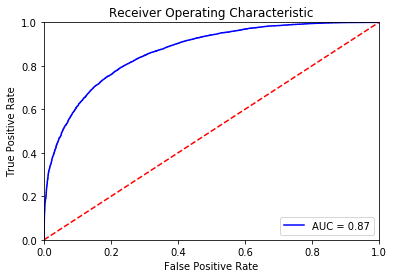

In [11]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()